# keras example - build a neural net 
Using the mnist digits 

_to do: document fully_

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras import layers, models
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense

from sklearn.metrics import confusion_matrix

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

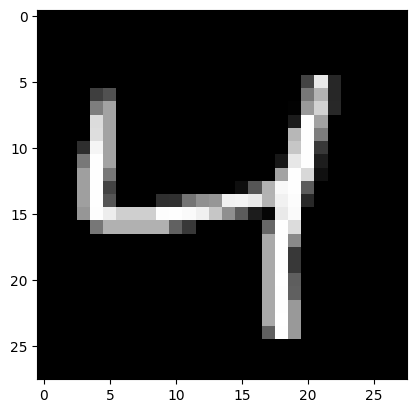

In [5]:
plt.imshow(X_train[0], cmap="gray")
plt.imshow(X_train[1], cmap="gray")
plt.imshow(X_train[2], cmap="gray")


In [6]:
y_train[y_train == 0] # returns all the zeros in the y_train
y_train[y_train == 1] # returns all the ones in the y_train

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

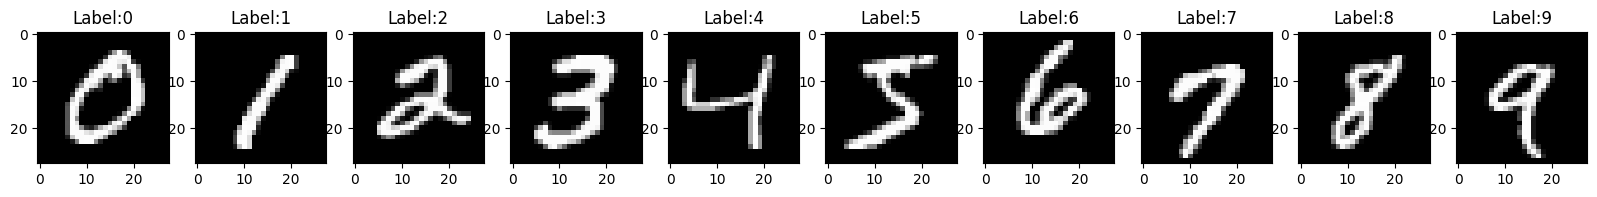

In [7]:
num_classes = 10

# Create a subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))  

# Loop through 10 classes from train dataset and add labels from test dataset
for i in range(num_classes): # 0 to 9
  sample = X_train[y_train == i][0] # Get first image from each class
  ax[i].imshow(sample, cmap="gray") # Show sample image
  ax[i].set_title(f"Label:{i}") # Set title as class label

In [8]:
for i in range(7):
    print(f"Before : {y_train[i]}")
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
for i in range(7):
    print(f"After : {y_train[i]}")


Before : 5
Before : 0
Before : 4
Before : 1
Before : 9
Before : 2
Before : 1
After : [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
After : [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
After : [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
After : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
After : [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
After : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
After : [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [9]:
X_train = X_train/255.0
X_test = X_test/255.0

In [10]:
X_train.shape

(60000, 28, 28)

In [11]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [12]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [13]:
model = Sequential()

model.add(Dense(units=128, input_shape=(784, ), activation="relu"))
model.add(Dense(units=16, activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 102714 (401.23 KB)
Trainable params: 102714 (401.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [14]:
BATCH_SIZE = 512
epochs = 11
model.fit(x=X_train, y=y_train, batch_size = BATCH_SIZE, epochs = epochs )

Epoch 1/11


118/118 [==============================] - 3s 8ms/step - loss: 0.7346 - accuracy: 0.7833
Epoch 2/11
118/118 [==============================] - 1s 5ms/step - loss: 0.2446 - accuracy: 0.9315
Epoch 3/11
118/118 [==============================] - 1s 7ms/step - loss: 0.1844 - accuracy: 0.9490
Epoch 4/11
118/118 [==============================] - 1s 11ms/step - loss: 0.1527 - accuracy: 0.9567
Epoch 5/11
118/118 [==============================] - 1s 6ms/step - loss: 0.1286 - accuracy: 0.9642
Epoch 6/11
118/118 [==============================] - 1s 9ms/step - loss: 0.1119 - accuracy: 0.9686
Epoch 7/11
118/118 [==============================] - 1s 8ms/step - loss: 0.0986 - accuracy: 0.9721
Epoch 8/11
118/118 [==============================] - 1s 7ms/step - loss: 0.0870 - accuracy: 0.9748
Epoch 9/11
118/118 [==============================] - 1s 7ms/step - loss: 0.0766 - accuracy: 0.9779
Epoch 10/11
118/118 [==============================] - 1s 5ms/step - loss: 0.0690 - accuracy: 0.9

In [15]:
train_loss, train_acc = model.evaluate(X_train, y_train)
test_loss, test_acc = model.evaluate(X_test, y_test)

# Print results
print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0902 - accuracy: 0.9723
Train Loss: 0.053995512425899506, Train Accuracy: 0.9853166937828064
Test Loss: 0.0902436301112175, Test Accuracy: 0.9722999930381775


In [16]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

# print vector of probabilities
print(f"What Softmax predicted: {y_pred}")

# print predicted number
print(f"What Softmax actually means: {y_pred_classes}")

313/313 [==============================] - 1s 2ms/step
What Softmax predicted: [[1.5217883e-05 3.0242072e-07 8.6497406e-05 ... 9.9876022e-01
  7.0912547e-06 4.1000021e-05]
 [4.4744320e-06 1.9275272e-03 9.9716395e-01 ... 2.9942811e-08
  9.1343679e-07 9.5146443e-12]
 [3.7885842e-05 9.9086189e-01 1.2433354e-03 ... 4.9457294e-03
  1.4772164e-03 4.4922646e-05]
 ...
 [1.5102707e-08 6.2629870e-09 3.4435988e-08 ... 1.8892002e-04
  7.8646817e-06 3.8577852e-04]
 [4.8953683e-05 2.5280076e-09 3.6315575e-09 ... 7.9212306e-08
  1.6129763e-03 4.9113331e-09]
 [5.6468630e-09 3.9773136e-11 1.9136431e-07 ... 4.7278053e-09
  5.9018768e-09 2.1367763e-09]]
What Softmax actually means: [7 2 1 ... 4 5 6]


In [17]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
random_num = np.random.choice(len(X_test))
X_sample = X_test[random_num]

# save true label of this sample in a variable
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

# save a predicted label of this sample in a variable
y_sample_pred_class = y_pred_classes[random_num]

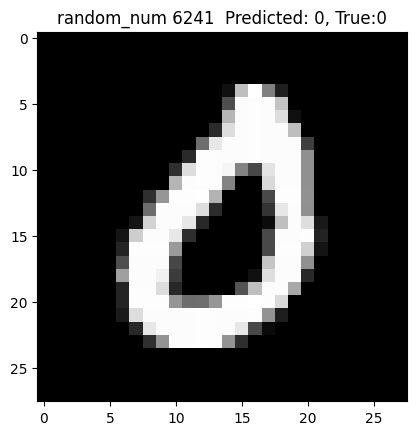

In [24]:
plt.title(f"random_num {random_num}  Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray");